## 1.Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./titanic.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


"Pclass": Hạng ghế

"Sex": giới tính hành khách.

"Age": tuổi theo năm

"Sibsp": số lượng anh chị em hoặc vợ/chồng cùng ở trên tàu.

"Parch": số lượng bô mẹ/con cái cùng ở trên tàu.

"Ticket": mã số vé.

"Fare": tiền vé.

"Cabin": mã số cabin.

"Embarked": Bến khởi hành

In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Một số thông tin thu được sau khi thực hiện kiếm tra:
- Các cột Age, Cabin xuất  hiện giá trị bị thiếu
- Các cột có kiểu dữ liêu định lượng là: PassengerId,Survived, 
- Các cột có kiểu dữ liêu định lượng là: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare.
- Các cột có kiểu dữ liệu định tính: Name, Sex, Ticket, Cabin, Embarket.

In [5]:
data.shape

(891, 12)

- Dữ liệu có 891 dòng, 12 cột


## 2.Check problems

#### a.Kiểm tra vấn đề thiếu dữ liệu

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cột Age bị thiếu 177 dữ liệu 

    Giải pháp: Bị mất 19,86% dữ liệu => Lấy Mean

- Cột Cabin bị thiếu 687 dữ liệu

    Giải pháp: Bị mất 77,1% dữ liệu => Bị mất nhiều dữ liệu => Dựa vào Fare và PClass để xác định Cabin

- Cột Embarked bị thiếu 2 dữ liệu 

    Giải pháp: Mất ít dữ liệu => Xoá 


### b. Kiểm tra vấn đề lặp dữ liệu

In [7]:
data.duplicated(subset=['Ticket'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

In [8]:
data.duplicated(subset = ['PassengerId']).sum()

0

In [9]:
data.duplicated(subset = ['Name']).sum()

0

In [10]:
data.duplicated(subset = ['Ticket']).sum()

210

In [11]:
data.duplicated(subset = ['Ticket']).sum() / len(data)*100

23.56902356902357

In [12]:
data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- Cột Ticket có 210 giá trị bị trùng lặp 

    Bị trùng lặp 23,56% dữ liệu bị trùng lặp 

=> Giải pháp: Thay thế giá trị bị lặp

### c. Kiểm tra vấn đề bất đồng bộ dữ liệu

In [13]:
data.Ticket.str.split().str.get(1).unique()


array(['21171', '17599', '3101282', nan, '9549', '2151', '17601', '17569',
       '24579', '17604', '2152', '2123', '23567', '39886', '17572',
       '31026', '34651', '2144', '17605', '29395', '3464', '33111',
       '14879', '14885', '6608', '392086', '5734', '2315', '17754',
       '17759', '2.', '17558', '54510', '17369', '3101307', '3337',
       '29178', '2133', '17593', '3101279', '33112', '1166', '11206',
       '851', '265302', '17597', '392090', '2343', '33595', '17318',
       '17595', '2131', '17610', '3540', '3101311', '13528', '21174',
       '3101283', '14208', '392089', '4348', '751', '21173', '29566',
       '6609', '31921', '1585', '14263', '3336', '17585', '17755',
       '17248', '17582', '17760', '17596', '2673', '10482', '2163',
       '17612', '2466', '17758', '3381', '17485', '17608', '13529',
       '21172', '17611', '37671', '2167', '3101310', '7076', '17477',
       '7077', '17757', '1748', '13032', '34244', '392078', '3085',
       '18723', '2817', '13531', 

Cột Ticket bị bất đồng bộ

{'whiskers': [<matplotlib.lines.Line2D at 0x254a4353040>,
 'caps': [<matplotlib.lines.Line2D at 0x254a43536a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254a4336d30>],
 'medians': [<matplotlib.lines.Line2D at 0x254a4353b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x254a4353e50>],
 'means': []}

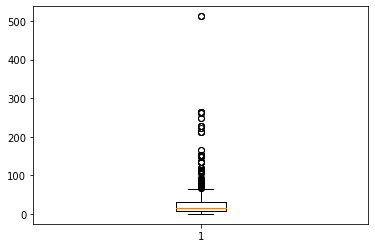

In [14]:
plt.boxplot(data['Fare'])

Cột Fare xuất hiện giá trị ngoại lai.

In [26]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Cột Cabin bị lỗi logic. 

Có những Cabin có 2 mã liền nhau vd C22 C26

Có những Cabin có 3 mã liền nhau vd C23 C25 C27 

# 3.Cleaning data

### Missing value


In [15]:
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [16]:
data['Age'].fillna(data['Age'].mean()).isnull().sum()

0

In [17]:
data.Embarked.dropna(axis = 0)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [18]:
data.Embarked.dropna(axis = 0).isnull().sum()

0

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [23]:
data['Cabin'].fillna(data['Cabin'].mode())

0      B96 B98
1          C85
2           G6
3         C123
4          NaN
        ...   
886        NaN
887        B42
888        NaN
889       C148
890        NaN
Name: Cabin, Length: 891, dtype: object

# 4. EDA

In [14]:
import matplotlib.pyplot as plt


#### 4.1 Tóm tắt thống kê

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Một số kết luận thu được từ bảng mô tả trên:
- "PassengerID", "Pclass" mặc dù là các thông tin dạng hạng mục, chúng vẫn được liệt kê ở đây vì khi không chỉ định cụ thể, các trường thông tin mà toàn bộ các giá trị có thể chuyển đổi về số được coi là thông tin dạng số.

- Ở mỗi trường thông tin, các thống kê được chỉ ra cho các giá trị không bị khuyết trong trường đó là:

    count: số lượng phần tử không bị khuyết,

    mean: giá trị trung bình,

    std: phương sai,

    min: giá trị nhỏ nhất,

    max: giá trị lớn nhất,

    50%: trung vị – giá trị mà ở đó có đúng một nửa số phần tử trong cột có giá trị nhỏ hơn hoặc bằng nó.

    25%: trung vị của các giá trị từ min tới 50%, tức có đúng 25% số phần tử trong cột có giá trị nhỏ hơn hoặc bằng nó,

    75%: trung vị của các giá trị từ 50% tới max, tức có đúng 75% số phần tử trong cột có giá trị nhỏ hơn hoặc bằng nó,

- Với cột Survived, giá trị trung bình trong cột là 0.384. Đây là cột nhãn mà mô hình cần dự đoán. Cột này chỉ mang các giá trị 0 và 1 nên ta có thể nói rằng 38.4% giá trị trong cột bằng 1. Việc này chứng tỏ dữ liệu tương đối cân bằng giữa hai lớp 0 và 1.

- Với cột Age, ta thấy rằng count = 714 và nhỏ hơn số lượng phần từ ở các cột còn lại (891). Việc này chứng tỏ có tới 891 - 714 = 177 mẫu dữ liệu có Age bị khuyết. Người nhỏ nhất trên tàu mới chỉ 0.42 tuổi, trong khi người nhiều tuổi nhất đã 80.

- Với cột Sibsp, số lượng anh chị em hoặc vợ/chồng nhiều nhất với một hành khách là 8, nhưng có tới 75% số hành khách có nhiều nhất 1 anh chị em hoặc vợ/chồng đi cùng. Việc này chứng tỏ phân bố của dữ liệu này khá lệch (skewed).

- Cột Parch cũng bị lệch tương tự khi có một hành khách có tới 6 con/bố mẹ trong khi 75% số hành khách không có con/bố mẹ đi cùng.

- Cột Fare cũng khá lệch khi trung binh là 32 trong khi trung vị chỉ là 14 và giá tri lớn nhất lên tới 512. Những hành khách với giá vé bằng 0 khả năng nằm trong thủy thủ đoàn.

### 4.2. Histogram và Bar Chart

a.Phân bố

[]

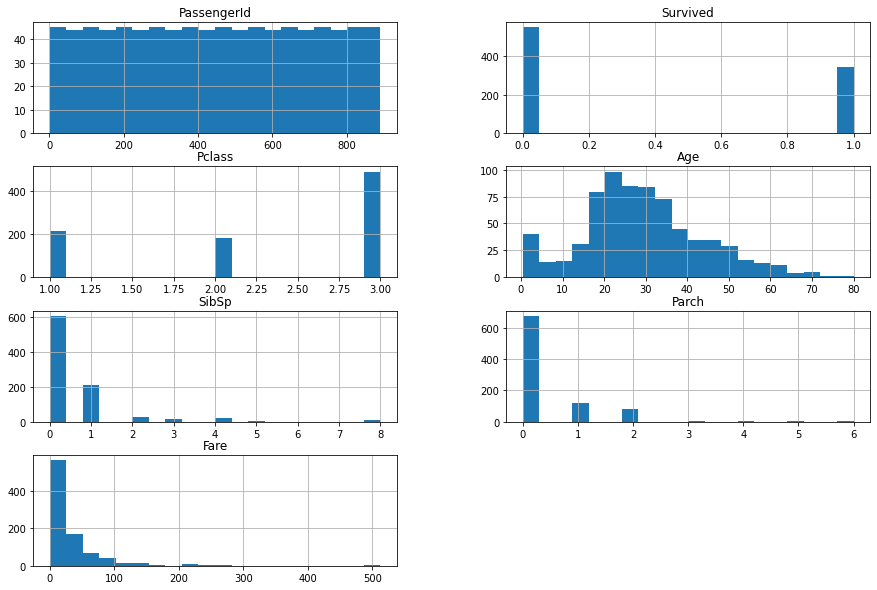

In [16]:
data.hist(bins=20, figsize=(15, 10), layout=(-1, 2))
plt.plot()

Nhận xét: 
- Age theo dạng Normal Distribution, Fare theo dạng Skewed Distribution
- Trong Age: Phần lớn hành khách có độ tuổi từ 18 -> 35
- Trong Fare: Với giá vé tăng, số khách hàng giảm
- Trong Parch: Phần lớn hành khách không có bố mẹ và con cái đi cùng
- Trong Pclass: Nhiều hành khách thuộc giai cấp cao
- Trong SibSp: Phần lớn hành khách không có anh chị em và vợ chồng đi cùng
- Trong Survived: Số lượng người sống sót và thiệt mạng có sự chênh lệch. Tuy chênh lệch không quá nhiều, có khả năng bạn sẽ phải sử dụng một số biện pháp để ngăn ngừa các vấn đề về class imbalance trong machine learning.

b. Biểu đồ vẽ riêng labels (sống sót, không sống sót):

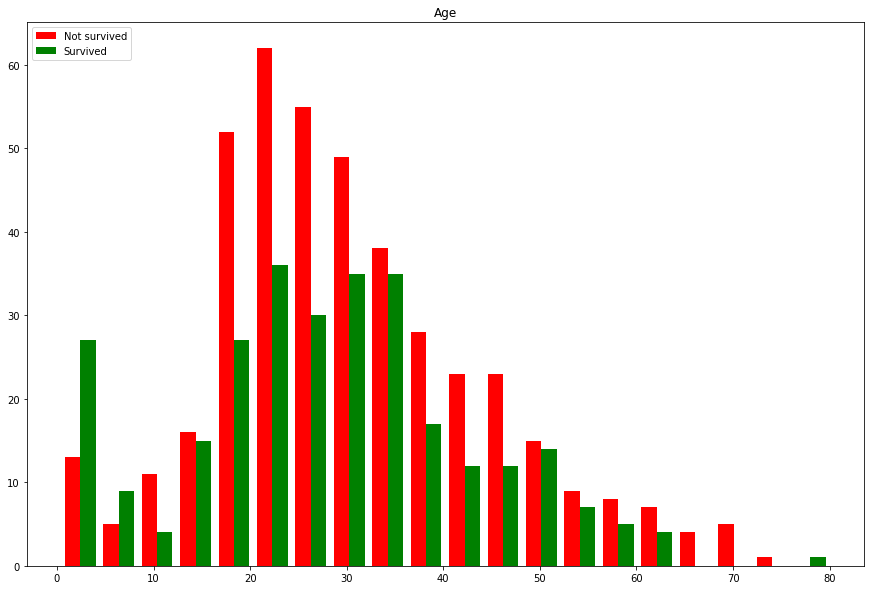

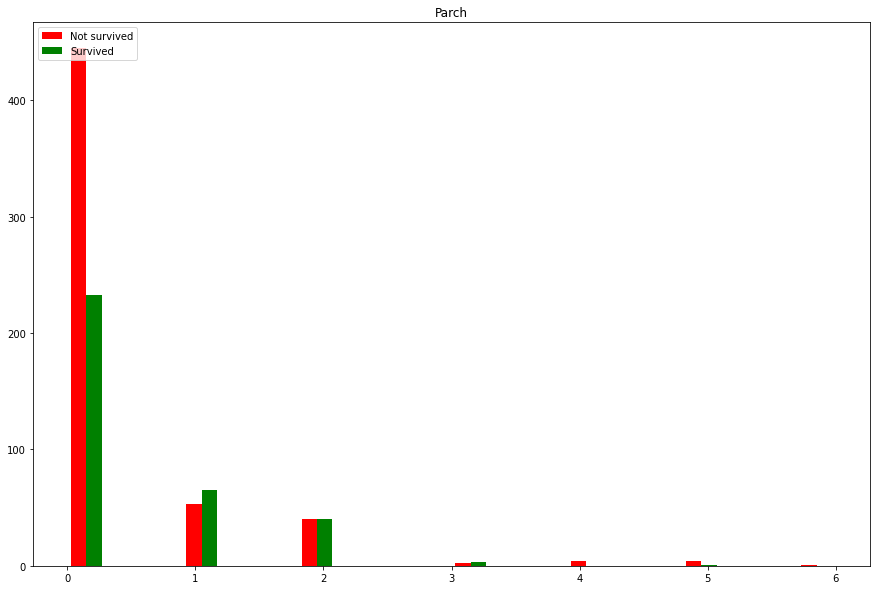

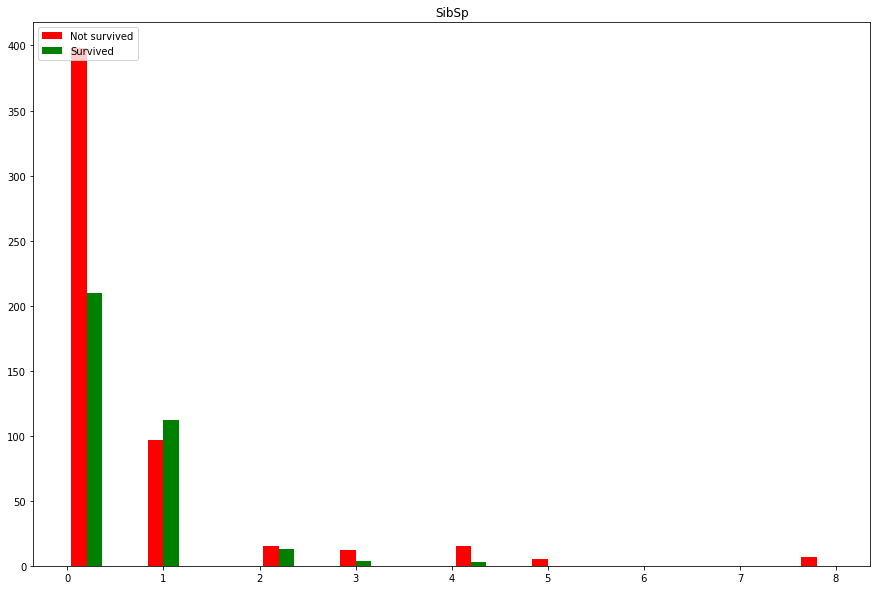

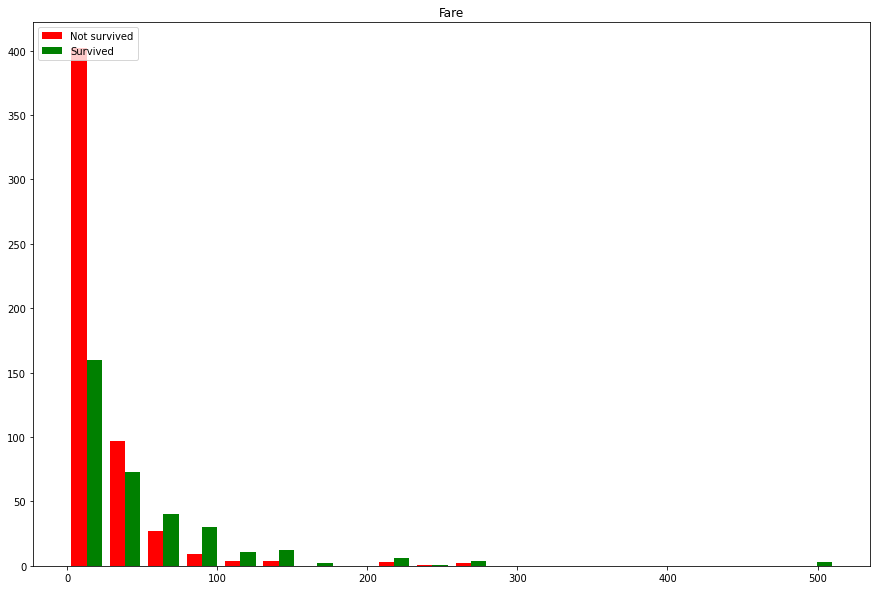

In [17]:
mat = data.loc[data["Survived"]==0.0]
song = data.loc[data["Survived"]==1.0]
for column in ["Age", "Parch", "SibSp", "Fare"]:
    plt.figure(figsize=(15, 10))
    mat_data = mat[column]
    song_data = song[column]
    plt.hist([mat_data, song_data], bins=20, color=["r", "g"], label=["Not survived", "Survived"])
    plt.legend(loc="upper left")
    plt.title(column)
    plt.show()

Nhận xét: 
- Hình 1: Trẻ con dưới 10 tuổi và người khoảng 50 -55 tuổi có khả năng sống sót cao.
- Hình 2: Những người có phụ huynh hoặc trẻ có từ 1 dến 3 người có khả năng sống sót cao
- Hình 3: Những người có số phụ huynh + trẻ có từ 1 dến 3 người có khả năng sống sót cao
- Hình 4: Những người có số anh em + vợ chồng 1 và 2 có khả năng sống sót cao

 

c. Kiểm tra khách hàng sống sót và không sống sót có gì khác nhau:

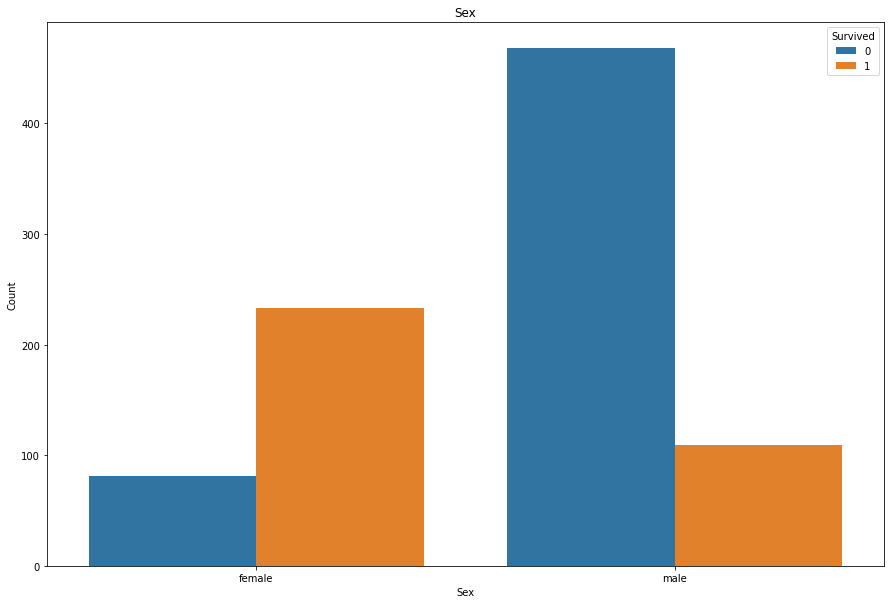

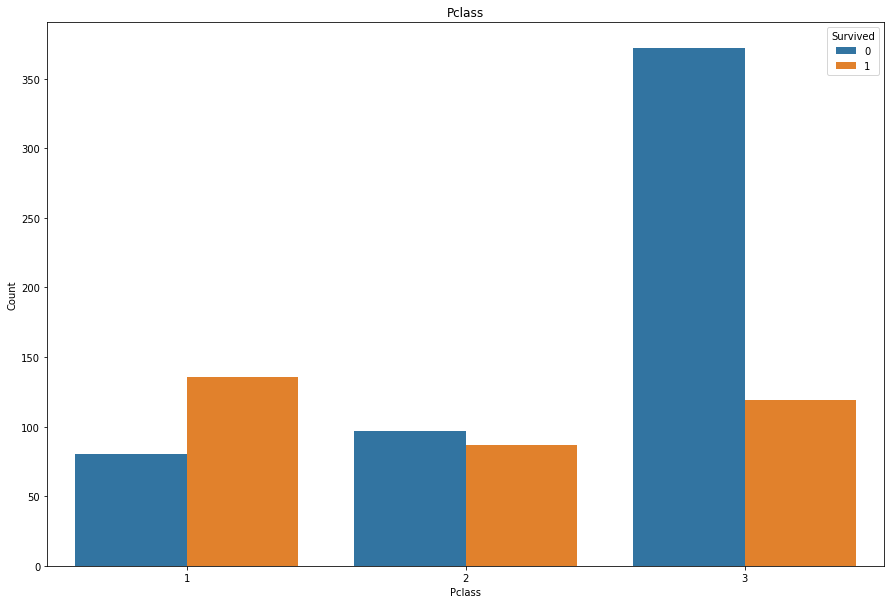

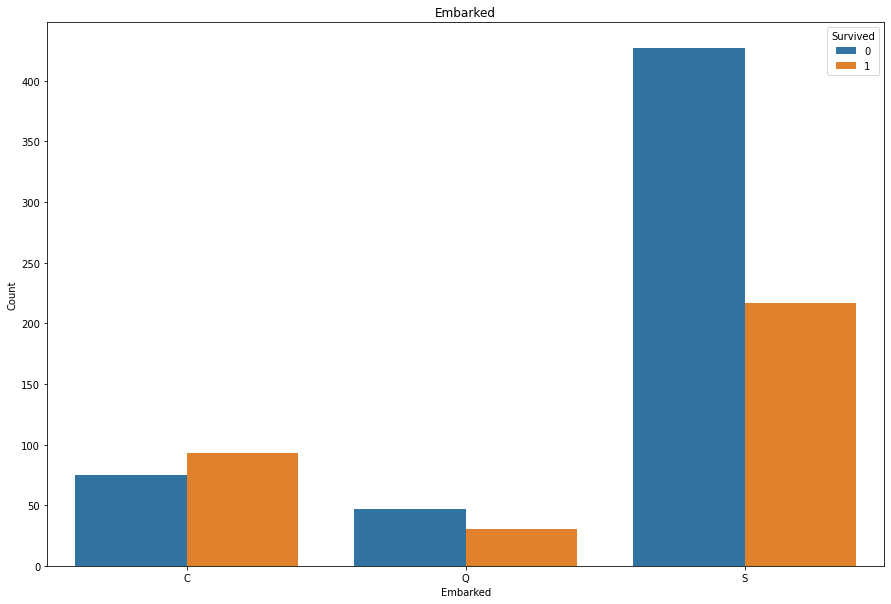

In [18]:
import seaborn as sns
for feature in ["Sex", "Pclass", "Embarked"]:
    feature_data = data.groupby(["Survived", feature])["PassengerId"].count().reset_index(name="Count")
    plt.figure(figsize=(15, 10))
    sns.barplot(x=feature, y="Count", hue="Survived", data=feature_data)
    plt.title(feature)
    plt.show()

Nhận xét:
- Hình 1: Phụ nữ có khả năng sống sót cao hơn đàn ông
- Hình 2: Người có giai cấp cao (Pclass thấp dần) có khả năng sống sót cao dần.
- Hình 3: Người xuất phát từ bến Cherbourg có khả năng sống sót cao.



d. Kiểm tra mối quan hệ

In [19]:
corr = data.corr()
corr.style.background_gradient(cmap="binary", low=0, high=0.2).set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_49324\2354282714.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="binary", low=0, high=0.2).set_precision(2)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


- Theo cặp features

    PClass và Fare có tỉ lệ nghịch khá cao. Nhiều khả năng vì giai cấp càng cao (PClass càng thấp) thì trả tiền vé càng cao.

    SibSp (số anh em + vợ chồng) và Parch (số phụ huynh và con cái) có tỉ lệ thuận khá cao.
- Giữa label (Survived) và các feature

    Giai cấp của hành khách (PClass) và khả năng sống sót có tỷ lệ nghịch. Vì PClass thấp thì giai cấp cao, những người giai cấp cao có khả năng lên thuyền cứu hộ hơn

    Giá vé và khả năng sống sót có tỷ lệ thuận.

=>Mối quan hệ giữa các features có vẻ hợp lý, và không có gì bất thường.